### Computer Graphics: Texture mapping for quadrilaterals with inverse bilinear interpolation
###### by Hamed Shah-Hosseini
Explanation at: https://www.pinterest.com/HamedShahHosseini/
<br>https://github.com/ostad-ai/Computer-Graphics

In [17]:
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt

In [120]:
# vertices is a python list, 
# which contains the vertices of polygon
# each vertex is a row of two columns
# function returns points inside
def polygon_points(vertices):
    vs=np.asarray(vertices)
    Nov=vs.shape[0]# no. of vertices
    points=[]
    xmin,xmax=int(vs[:,0].min()),int(vs[:,0].max())
    ymin,ymax=int(vs[:,1].min()),int(vs[:,1].max())
    for x in range(xmin,xmax+1):
        for y in range(ymin,ymax+1):
            #vertices must be a list do this
            if [x,y] in vertices:
                points.append([x,y]); continue
            p1=0; insideFlag=False            
            for i in range(1,Nov+1):                
                p2=i%Nov
                if (y>min(vs[p1,1],vs[p2,1])) and\
                (y<=max(vs[p1,1],vs[p2,1])) and\
                (x<=max(vs[p1,0],vs[p2,0])):
                    x_intersection=(y-vs[p1,1])*\
                    (vs[p2,0]-vs[p1,0])/(vs[p2,1]-vs[p1,1])+\
                    vs[p1,0]
                    if x<=x_intersection:
                        insideFlag=not insideFlag
                p1=p2
            if insideFlag:
                points.append([x,y])
    return np.asarray(points)

In [137]:
# two-dimensional cross product
def cross2D(a,b):
    return a[0]*b[1]-a[1]*b[0]

# inverse bilinear interpolation
def get_uvs(points,vertices):
    b=vertices[1]-vertices[0]
    c=vertices[3]-vertices[0]
    d=vertices[2]-vertices[1]-vertices[3]+vertices[0]
    A=-cross2D(c,d)
    uvs=[]
    for p_xy in points:
        a=p_xy-vertices[0]
        B=cross2D(a,d)+cross2D(b,c)
        C=cross2D(a,b)
        delta=B**2-(4*A*C)
        if delta<0:
            print('Arguments are not correct!!!')
        if A==0:
            if B==0:
                v=0.
            else:
                v=-C/B
        else:
            v=(-B+sqrt(delta))/(2*A)
            if (v<0) or (v>1):
                v=(-B-sqrt(delta))/(2*A)
        u=(a[0]-v*c[0])/(b[0]+v*d[0])
        uvs.append([u,v])
    return np.asarray(uvs)

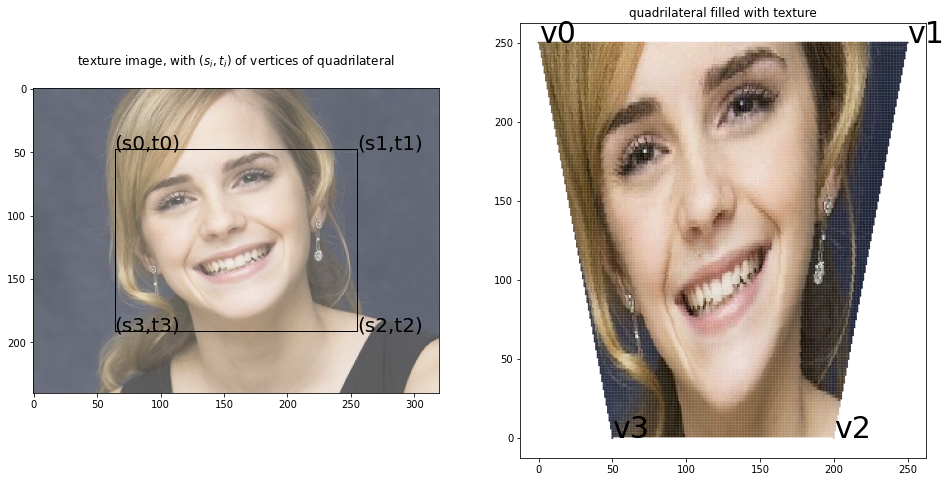

In [138]:
#texture mapping with inverse bilinear interpolation
# four vertices of the quadrilateral
vertices_np=250*np.array([[0.,1.],[1.,1.],[.8,0.],[.2,0.]])
vertices_list=vertices_np.tolist()
#texture coordinates (s,t) for vertices
assignments={0:[.2,.2],1:[.8,.2],2:[.8,.8],3:[.2,.8]}
#loading the texture
image=plt.imread('./images/emma-watson-small.jpg')
img_h,img_w=image.shape[:2]
#points inside quadrilateral
ps=polygon_points(vertices_list)
# uvs for points inside the quadrilateral
uvs=get_uvs(ps,vertices_np)
cs=[]
st=np.zeros(2) #s for x, t for y
for id in range(ps.shape[0]):
    u,v=uvs[id]; st.fill(0.)
    temp=np.array([(1-u)*(1-v),u*(1-v),u*v,(1-u)*v])
    st=np.dot(temp.reshape(1,-1),
        np.asarray(list(assignments.values()))).flatten()
    st*=np.array([img_w-1,img_h-1])
    xy=np.round(st).astype('int')
    cs.append(image[xy[1],xy[0]].copy())
cs=np.asarray(cs); vertex_on_images=[]
for assign in assignments:
    vertex_on_images.append(assignments[assign])
vertex_on_images=np.asarray(vertex_on_images)
vertex_on_images*=np.array([img_w-1,img_h-1])
plt.figure(figsize=(16,8)); plt.subplot(121)
plt.imshow(image,alpha=.7)
plt.title('texture image, with $(s_i,t_i)$'+
          ' of vertices of quadrilateral\n')
for i,(x,y) in enumerate(vertex_on_images):
    plt.text(x,y,f'(s{i},t{i})',fontsize=20)
p1=plt.Polygon(vertex_on_images,fill=False)
plt.gca().add_patch(p1); plt.subplot(122)
plt.scatter(ps[:,0],ps[:,1],c=cs/255,s=1)
for i,(x,y) in enumerate(vertices_np):
    plt.text(x,y,f'v{i}',fontsize=30)
plt.title('quadrilateral filled with texture')
plt.show()